<a href="https://colab.research.google.com/github/PaSathees/random-notebooks/blob/main/PyTorch_Transfer_learning_testing_with_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[PyTorch course notebook](https://github.com/PaSathees/ai-courses/blob/main/3.%20PYTORCH%20-%20UDEMY/6.%20PyTorch%20Transfer%20Learning/06_pytorch_transfer_learning.ipynb)

[Modular code repo](https://github.com/PaSathees/pytorch-bp)

# 1. Imports and environment setup

In [1]:
# Getting modue
!rm -rf pytorch_mod
!git clone https://github.com/PaSathees/pytorch_mod.git

Cloning into 'pytorch_mod'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 146 (delta 88), reused 91 (delta 40), pack-reused 0
Receiving objects: 100% (146/146), 34.55 KiB | 1.38 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [2]:
pip install -r pytorch_mod/requirements.txt --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.8 MB/s eta 

In [3]:
from pytorch_mod import env_setup, data_setup, engine, evaluation, utils, visualization, experimentation, deployment, cv_model_builders

In [4]:
env_setup.print_gpu_status()

1 Supported CUDA GPU available


In [5]:
device = env_setup.get_agnostic_device()
device

'cuda'

In [6]:
env_setup.print_versions()

PyTorch Version: 2.0.1+cu118
Matplotlib Version: 3.7.1
Pandas Version: 1.5.3
Numpy Version: 1.23.5
Torchvision Version: 0.15.2+cu118
Torchaudio Version: 2.0.2+cu118
Scikit-learn Version: 1.2.2
Torchmetrics Version: 1.1.1
TQDM Version: 4.66.1
MLEXTEND Version: 0.22.0
PIL Version: 9.4.0
Torchinfo Version: 1.8.0
Gradio Version: 3.43.1


In [7]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torchinfo import summary

# 2. Getting data
Data is from the course given in a zip file.

No need to bother with the problem as this is only testing modularized code.

In [8]:
image_path = utils.download_data(
    source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
    destination="pizza_steak_sushi",
    remove_source = True
)

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


In [9]:
train_dir = image_path / "train"
test_dir = image_path / "test"

# 3. Explore Data (New)

In [10]:
utils.walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


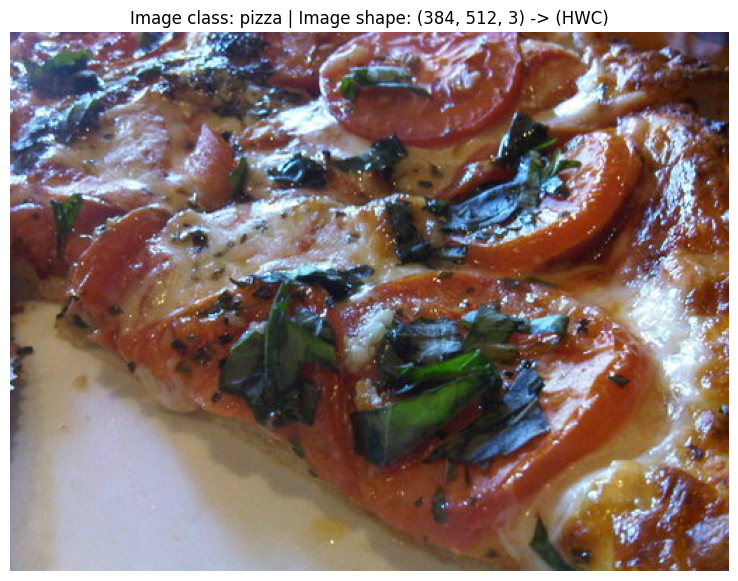

In [11]:
visualization.plot_random_images(image_path)

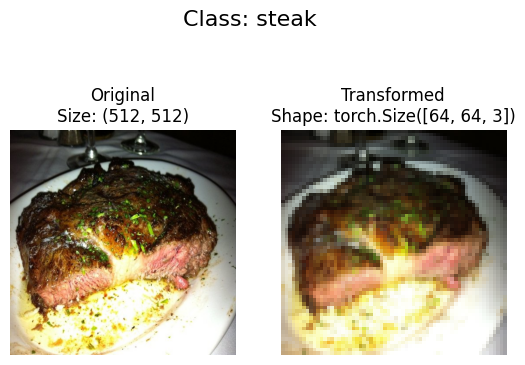

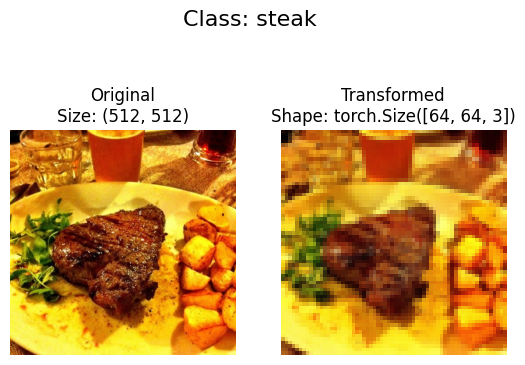

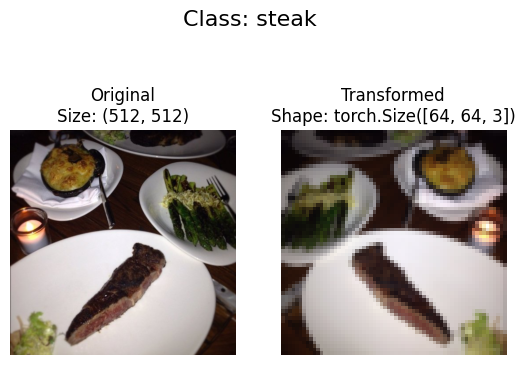

In [12]:
data_transform = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

visualization.plot_random_transformed_images(dir_path=image_path,
                        transform=data_transform)

# 4. Creating Datasets (New)

## 4.1 Using ImageFolder (Already implemented in datasetup.py)

In [13]:
# Also included in the Dataloaders
# weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
# auto_transforms = weights.transforms()
# train_dataloader, test_dataloader, class_names = data_setup.create_cv_dataloaders(train_dir=train_dir,
#                                                                        test_dir=test_dir,
#                                                                        train_transform=auto_transforms,
#                                                                        test_transform=auto_transforms,
#                                                                        batch_size=32)

# train_dataloader, test_dataloader, class_names

In [14]:
# Datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [15]:
train_data.classes

['pizza', 'steak', 'sushi']

In [16]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
# Dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

len(train_dataloader), len(test_dataloader)

(225, 75)

## 4.2 Using Custom Dataset (New)

In [18]:
from typing import Tuple, Dict, List
import os
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")

  # 3. Create a dictionary of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [19]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [20]:
from torch.utils.data import Dataset
from pathlib import Path
from PIL import Image

class ImageFolderCustom(Dataset):
  def __init__(self,
               targ_dir: str,
               transform=None):
    self.paths = list(Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # if path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image, label (X, y)

# 5. Creating dataloaders

In [21]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [22]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [23]:
# Create datasets
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=auto_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=auto_transforms)

train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [24]:
# Dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(dataset=train_data_custom,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data_custom,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

len(train_dataloader), len(test_dataloader)

(225, 75)

In [25]:
class_names = train_data_custom.classes

# 6. Getting Pre-trained model

In [26]:
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 111MB/s] 


In [27]:
summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [28]:
# Freeze features
for param in model.features.parameters():
  param.requires_grad = False

In [29]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(class_names)

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape,
                    bias=True)
).to(device)

In [30]:
summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

# 7. Training Model

In [31]:
# Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [32]:
utils.set_seeds()

results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       val_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

[INFO] Using device: cuda


  0%|          | 0/5 [00:00<?, ?it/s]

[INFO] Epoch: 1 | Train_loss: 1.1524 | Train_acc: 0.3822 | Val_loss: 1.1282 | Val_acc: 0.2800
[INFO] Epoch: 2 | Train_loss: 1.1319 | Train_acc: 0.3822 | Val_loss: 1.0694 | Val_acc: 0.3600
[INFO] Epoch: 3 | Train_loss: 1.1349 | Train_acc: 0.3867 | Val_loss: 1.0733 | Val_acc: 0.4000
[INFO] Epoch: 4 | Train_loss: 1.1022 | Train_acc: 0.3644 | Val_loss: 1.0543 | Val_acc: 0.3733
[INFO] Epoch: 5 | Train_loss: 1.0891 | Train_acc: 0.4222 | Val_loss: 1.0640 | Val_acc: 0.5067
[INFO] Training time: 26.477 seconds


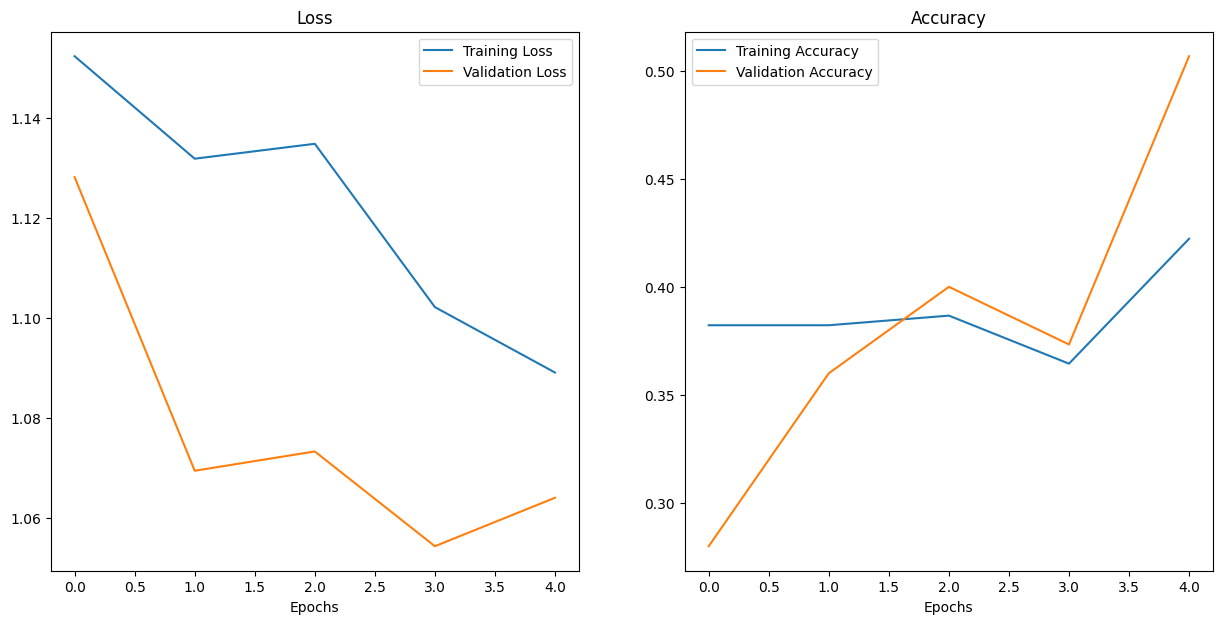

In [33]:
visualization.plot_curves(results)

# 8. Making Predictions

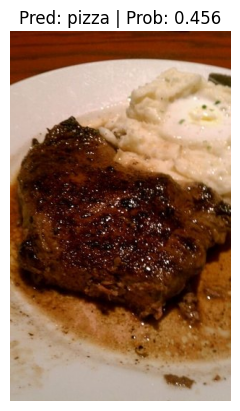

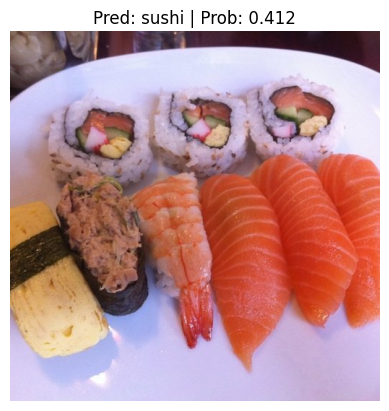

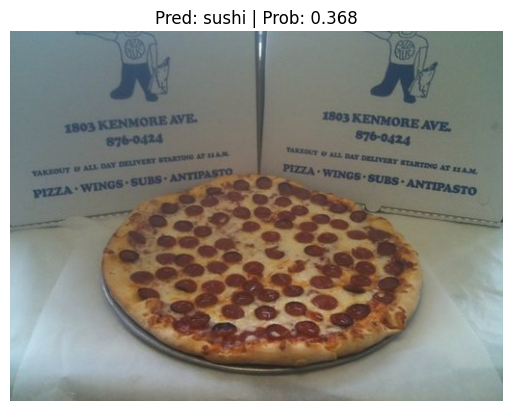

In [34]:
evaluation.pred_and_plot_local_random_images(model=model,
                        test_dir_path=test_dir,
                        class_names=class_names,
                        device=device,
                        transform=weights.transforms())

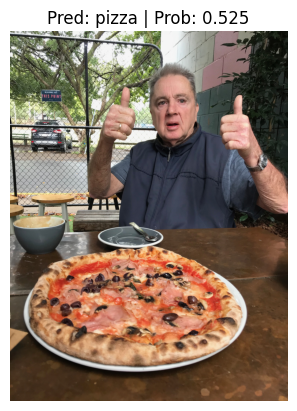

In [35]:
evaluation.pred_on_custom_image_url(model=model,
                                    class_names=class_names,
                                    device=device,
                                    transform=weights.transforms(),
                                    url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")

Saving Pizza.jpg to Pizza.jpg
Saving sushi.jpeg to sushi.jpeg


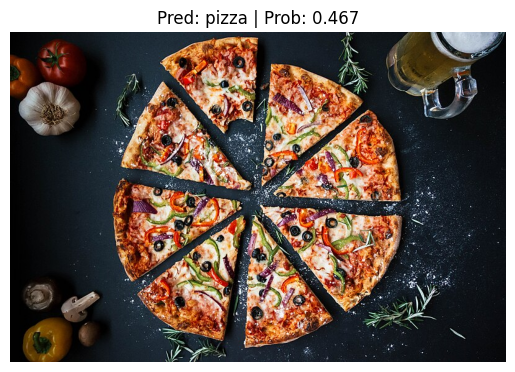

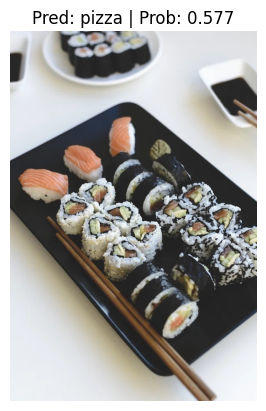

In [36]:
evaluation.pred_and_plot_colab_interface(
    model=model,
    class_names=class_names,
    device=device,
    transform=weights.transforms(),
)

Making Predictions:   0%|          | 0/75 [00:00<?, ?it/s]

{'model_name': 'EfficientNet',
 'model_loss': 1.0640240907669067,
 'model_acc': 0.5066666603088379,
 'model_precision': 0.5066666603088379,
 'model_recall': 0.5066666603088379,
 'model_fl_score': 0.5066666603088379,
 'model_confusion_matrix': array([[17,  2,  6],
        [14,  3,  2],
        [12,  1, 18]])}

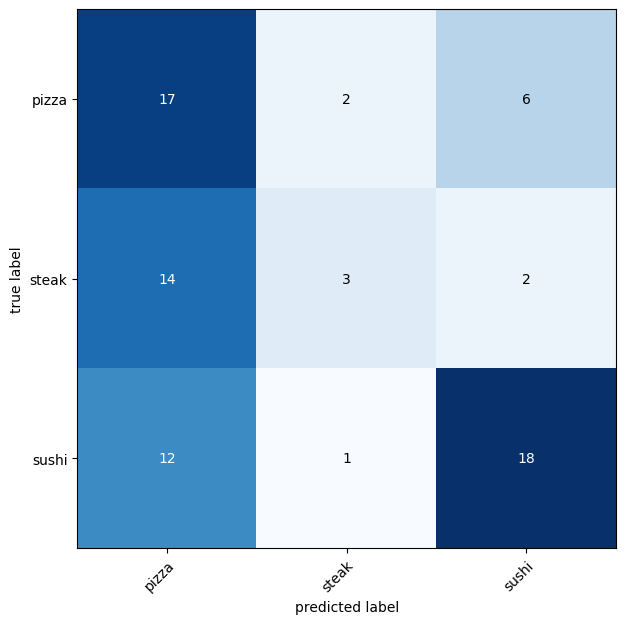

In [37]:
evaluation.evaluate_model_metrics(
    model=model,
    test_dataloader=test_dataloader,
    device=device,
    class_names=class_names,
    task="multiclass",
    loss_fn=loss_fn
)

In [38]:
report = evaluation.evaluate_classification_report(
    model=model,
    test_dataloader=test_dataloader,
    device=device,
    class_names=class_names,
    task="multiclass"
)

print(report)

Making Predictions:   0%|          | 0/75 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       pizza       0.40      0.68      0.50        25
       steak       0.50      0.16      0.24        19
       sushi       0.69      0.58      0.63        31

    accuracy                           0.51        75
   macro avg       0.53      0.47      0.46        75
weighted avg       0.54      0.51      0.49        75



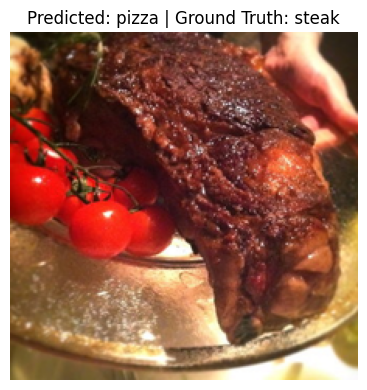

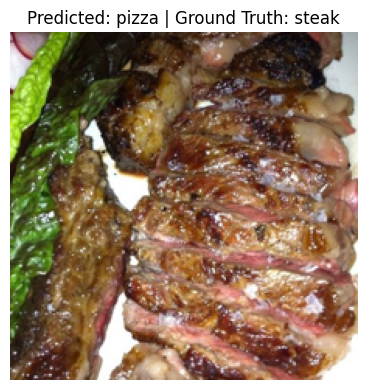

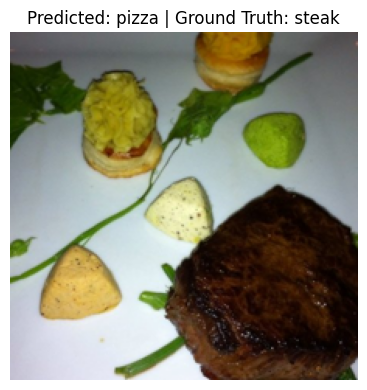

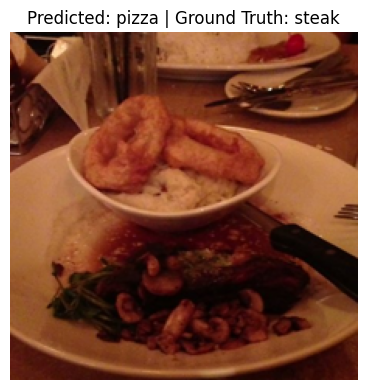

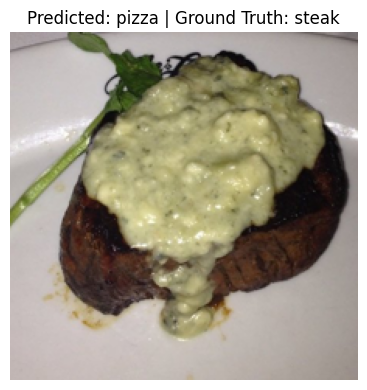

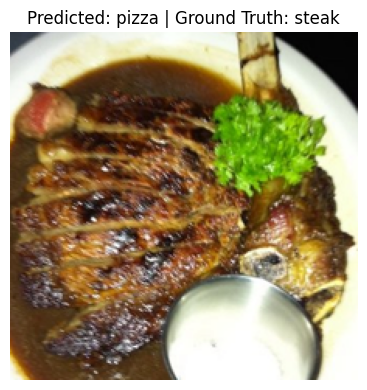

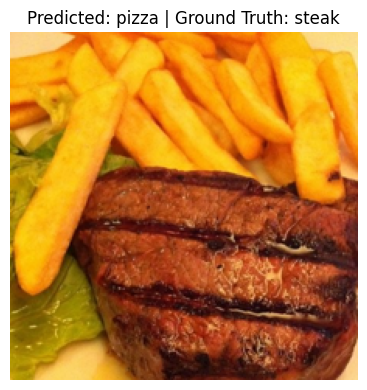

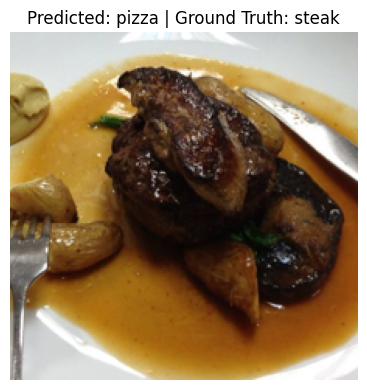

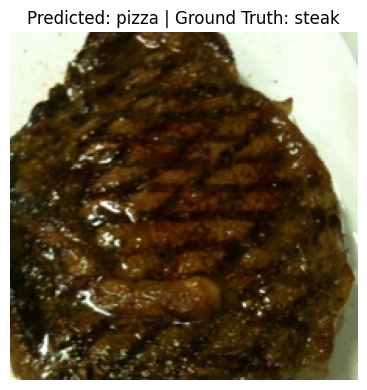

In [39]:
failed_image_gen = evaluation.failed_image_generator(
    model,
    test_dataloader,
    device,
    task="multiclass",
    threshold=0.5
)
evaluation.plot_failed_images_from_generator(
    failed_image_gen,
    class_names,
    transform=auto_transforms,
    max_images=10
)

In [40]:
print("Happy building models, end of notebook")

Happy building models, end of notebook
